## Graphing TUFLOW

Convert __*modelname_event_scenario_PO.csv*__ files into graphs for reports

###### Python Imports
Import NumPy, Pandas and Matplotlib

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = [8,5]

###### Load Files
Change to file names uploaded through file manager

In [2]:
df_dataset_s00 = pd.read_csv('rafts_100y/142-15_DA_s00_002_100y060m_tot.ts1', skiprows = 8)
df_dataset_s01 = pd.read_csv('rafts_100y/142-15_DA_s00_002_100y120m_tot.ts1', skiprows = 8)

df_dataset_s02 = pd.read_csv('rafts_100y/142-15_DA_s01_001_100y030m_tot.ts1', skiprows = 8)
df_dataset_s03 = pd.read_csv('rafts_100y/142-15_DA_s01_001_100y090m_tot.ts1', skiprows = 8)
df_dataset_s04 = pd.read_csv('rafts_100y/142-15_DA_s01_001_100y120m_tot.ts1', skiprows = 8)

###### Convert Time series to Minutes if in hours
Need to manually review units the model is output as 

In [3]:
dataset_s00_timeseries = df_dataset_s00['Time (min)'].tolist()
dataset_s01_timeseries = df_dataset_s01['Time (min)'].tolist()

dataset_s02_timeseries = df_dataset_s02['Time (min)'].tolist()
dataset_s03_timeseries = df_dataset_s03['Time (min)'].tolist()
dataset_s04_timeseries = df_dataset_s04['Time (min)'].tolist()

###### Collect Data to be Graphed

In [4]:
# Hydrographs
values_s00 = df_dataset_s00['F 1-3'].tolist()
values_s01 = df_dataset_s01['F 1-3'].tolist()

values_s02 = df_dataset_s02['F 1-3'].tolist()
values_s03 = df_dataset_s03['F 1-3'].tolist()
values_s04 = df_dataset_s04['F 1-3'].tolist()

###### Setup Graphs using Matplotlib
Matplotlib basic setup

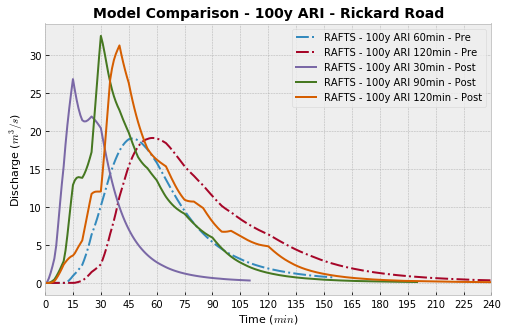

In [5]:
plot_title = "Model Comparison - 100y ARI - Rickard Road"
plot_label_s00 = "RAFTS - 100y ARI 60min - Pre"
plot_label_s01 = "RAFTS - 100y ARI 120min - Pre"
plot_label_s02 = "RAFTS - 100y ARI 30min - Post"
plot_label_s03 = "RAFTS - 100y ARI 90min - Post"
plot_label_s04 = "RAFTS - 100y ARI 120min - Post"

min_time = 0
max_time = 240  # in minutes

# Graph Styling
fontlarge = {'family': 'sans-serif',
              'color': 'black',
              'weight': 'bold',
              'size': 14,
              }
fontsmall = {'family': 'sans-serif',
              'color':  'black',
              'weight': 'normal',
              'size': 11,
              }
plt.style.use('bmh')

plt.title(plot_title, fontdict = fontlarge)

plt.xlabel('Time ($min$)', fontdict = fontsmall)
plt.xlim(min_time, max_time)
plt.xticks(np.arange(min_time, max_time + 1, 15))

plt.ylabel('Discharge ($m^3/s$)', fontdict = fontsmall)

plt.plot(dataset_s00_timeseries, values_s00, label = plot_label_s00, linestyle = '-.')
plt.plot(dataset_s01_timeseries, values_s01, label = plot_label_s01, linestyle = '-.')

plt.plot(dataset_s02_timeseries, values_s02, label = plot_label_s02)
plt.plot(dataset_s03_timeseries, values_s03, label = plot_label_s03)
plt.plot(dataset_s04_timeseries, values_s04, label = plot_label_s04)

plt.legend(loc = 1)

plt.savefig('rafts_100y/rafts_plot.png', dpi = 100)
plt.show()

In [6]:
print("RAFTS")
print("Pre-Dev (060m): ", np.max(df_dataset_s00['F 1-3']))
print("Pre-Dev (120m): ", np.max(df_dataset_s01['F 1-3']))

print("Post-Dev (030m): ", np.max(df_dataset_s02['F 1-3']))
print("Post-Dev (090m): ", np.max(df_dataset_s03['F 1-3']))
print("Post-Dev (120m): ", np.max(df_dataset_s04['F 1-3']))

RAFTS
Pre-Dev (060m):  19.021
Pre-Dev (120m):  19.102
Post-Dev (030m):  26.862
Post-Dev (090m):  32.555
Post-Dev (120m):  31.294
